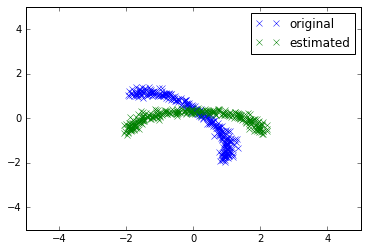

In [23]:
# -*- coding: utf-8 -*-
%matplotlib inline
import math
import numpy as np
import scipy.linalg
from matplotlib import pyplot as plt

# 楕円を生成し半分だけ消す
# Generate ellipse
X=np.array([2*np.cos(np.arange(0,2*math.pi,0.01)),np.sin(np.arange(0,2*math.pi,0.01))]).T
# add noise
X=X+np.random.normal(0,0.1,X.shape)

# 楕円を４５度回転する
# Rotate ellipse
theta=np.array([[np.cos(math.pi/4),-np.sin(math.pi/4)], [np.sin(math.pi/4),np.cos(math.pi/4)]])
XX=np.dot(X[:300,:],theta)
# Centerize data
XX = XX-np.dot(np.matrix(np.ones(len(XX))).T,np.matrix(np.mean(XX,0)))

# 回転後の楕円データから、元の直交系から何度回転しているか計算し、元に戻す
# Revert rotated ellipse to original one
[U,S,V]=scipy.linalg.svd(XX);
Y=np.dot(U[:,:2],np.diag(S))

# Visualize
plt.plot(XX[:,0],XX[:,1],'x');
plt.plot(Y[:,0],Y[:,1],'x');
plt.xlim(-5,5);plt.ylim(-5,5);
plt.legend(['original','estimated'])
plt.show()


In [3]:
X.shape

(629, 2)

In [21]:
X = X-np.dot(np.matrix(np.ones(len(X))).T,np.matrix(np.mean(X,0)))

matrix([[ 1.90829692, -0.07292785],
        [ 2.05481811,  0.00264243],
        [ 1.88876583,  0.06591039],
        ..., 
        [ 2.16395175, -0.07443491],
        [ 2.15748735, -0.11311062],
        [ 1.93234123, -0.12908255]])

In [12]:
np.matrix(np.ones(len(X))).T.shape

(629, 1)

In [16]:
np.matrix(np.mean(X,0)).shape

(1, 2)